In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Convert the data to Tensor
transform = transforms.ToTensor()

### Load the CIFAR10 dataset

In [10]:
# Load CIFAR-10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### MLP Model

The MLP model class is identical to the Fashion-MNIST model class but has been adjusted according to the image dimensions in CIFAR-10.

In [11]:
class CifarNN(nn.Module):
    """
    A simple neural network for classifying CIFAR-10 Images. The network has 2 fully connected layers with ReLU activation and
    a final layer with 10 output categories.
    """
    def __init__(self, hidden_dim):
        super(CifarNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 *3, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.final_layer = nn.Linear(hidden_dim, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.final_layer(x)
        
        return x

The training(`train_nn`) and evaluation (`evaluate_nn`) functions used here are the same as those from the previous assignment, as they perform identical operations.

### Training function

In [12]:
def train_nn(model, train_loader, criterion, optimizer, device):
    """Function to train the neural network for one epoch"""
    model.train()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted_labels = torch.argmax(outputs, dim=1)
        total_labels += labels.size(0)
        correct_labels += torch.sum(predicted_labels == labels).item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_labels / total_labels
    
    return train_loss, train_accuracy

### Evaluation Function

In [13]:
def evaluate_nn(model, test_loader, criterion, device):
    """
    Function to evaluate the neural network on the test data.
    """
    model.eval()
    running_loss = 0.0
    correct_labels = 0
    total_labels = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            predicted_labels = torch.argmax(outputs, dim=1)
            total_labels += labels.size(0)
            correct_labels += torch.sum(predicted_labels == labels).item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = correct_labels / total_labels
    return test_loss, test_accuracy

### Training MLP

Taken from the previous assignment

In [14]:
def run_training(hidden_dim, lr, num_epochs):
    """
    Function to train and evaluate the model for a given number of epochs.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CifarNN(hidden_dim).to(device)                    # Initialize model
        
    criterion = nn.CrossEntropyLoss()                           # Loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)            # Optimizer

    train_losses = []
    test_losses = []
    
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    # Returns the model metrics.
    return model, train_losses, train_accuracies, test_losses, test_accuracies

In [15]:
hidden_dim = 128
lr = 0.001
num_epochs = 20

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies = run_training(hidden_dim, lr, num_epochs)


  5%|██▊                                                     | 1/20 [00:19<06:15, 19.75s/it]

Epoch 1/20
Train Loss: 1.8610, Train Acc: 0.3194
Test Loss: 1.7846, Test Acc: 0.3602


 10%|█████▌                                                  | 2/20 [00:41<06:19, 21.11s/it]

Epoch 2/20
Train Loss: 1.6954, Train Acc: 0.3893
Test Loss: 1.6471, Test Acc: 0.4103


 15%|████████▍                                               | 3/20 [01:04<06:12, 21.90s/it]

Epoch 3/20
Train Loss: 1.6339, Train Acc: 0.4118
Test Loss: 1.6081, Test Acc: 0.4157


 20%|███████████▏                                            | 4/20 [01:28<06:01, 22.58s/it]

Epoch 4/20
Train Loss: 1.5981, Train Acc: 0.4236
Test Loss: 1.6397, Test Acc: 0.4056


 25%|██████████████                                          | 5/20 [01:52<05:45, 23.00s/it]

Epoch 5/20
Train Loss: 1.5715, Train Acc: 0.4332
Test Loss: 1.6320, Test Acc: 0.4146


 30%|████████████████▊                                       | 6/20 [02:14<05:21, 22.98s/it]

Epoch 6/20
Train Loss: 1.5524, Train Acc: 0.4385
Test Loss: 1.5559, Test Acc: 0.4370


 35%|███████████████████▌                                    | 7/20 [02:37<04:55, 22.76s/it]

Epoch 7/20
Train Loss: 1.5326, Train Acc: 0.4454
Test Loss: 1.5510, Test Acc: 0.4356


 40%|██████████████████████▍                                 | 8/20 [02:59<04:31, 22.63s/it]

Epoch 8/20
Train Loss: 1.5199, Train Acc: 0.4528
Test Loss: 1.5360, Test Acc: 0.4508


 45%|█████████████████████████▏                              | 9/20 [03:21<04:04, 22.27s/it]

Epoch 9/20
Train Loss: 1.5124, Train Acc: 0.4558
Test Loss: 1.5559, Test Acc: 0.4442


 50%|███████████████████████████▌                           | 10/20 [03:42<03:40, 22.02s/it]

Epoch 10/20
Train Loss: 1.5037, Train Acc: 0.4599
Test Loss: 1.5382, Test Acc: 0.4497


 55%|██████████████████████████████▎                        | 11/20 [04:04<03:17, 21.91s/it]

Epoch 11/20
Train Loss: 1.4933, Train Acc: 0.4626
Test Loss: 1.5390, Test Acc: 0.4568


 60%|█████████████████████████████████                      | 12/20 [04:26<02:54, 21.87s/it]

Epoch 12/20
Train Loss: 1.4894, Train Acc: 0.4643
Test Loss: 1.5307, Test Acc: 0.4547


 65%|███████████████████████████████████▊                   | 13/20 [04:48<02:34, 22.09s/it]

Epoch 13/20
Train Loss: 1.4826, Train Acc: 0.4650
Test Loss: 1.5251, Test Acc: 0.4568


 70%|██████████████████████████████████████▌                | 14/20 [05:11<02:14, 22.34s/it]

Epoch 14/20
Train Loss: 1.4762, Train Acc: 0.4677
Test Loss: 1.5205, Test Acc: 0.4532


 75%|█████████████████████████████████████████▎             | 15/20 [05:33<01:51, 22.22s/it]

Epoch 15/20
Train Loss: 1.4712, Train Acc: 0.4708
Test Loss: 1.5095, Test Acc: 0.4637


 80%|████████████████████████████████████████████           | 16/20 [05:56<01:30, 22.58s/it]

Epoch 16/20
Train Loss: 1.4651, Train Acc: 0.4708
Test Loss: 1.5213, Test Acc: 0.4579


 85%|██████████████████████████████████████████████▊        | 17/20 [06:22<01:10, 23.45s/it]

Epoch 17/20
Train Loss: 1.4635, Train Acc: 0.4719
Test Loss: 1.5578, Test Acc: 0.4420


 90%|█████████████████████████████████████████████████▌     | 18/20 [06:50<00:49, 24.87s/it]

Epoch 18/20
Train Loss: 1.4584, Train Acc: 0.4749
Test Loss: 1.5344, Test Acc: 0.4464


 95%|████████████████████████████████████████████████████▎  | 19/20 [07:16<00:25, 25.21s/it]

Epoch 19/20
Train Loss: 1.4531, Train Acc: 0.4770
Test Loss: 1.5049, Test Acc: 0.4663


100%|███████████████████████████████████████████████████████| 20/20 [07:43<00:00, 23.17s/it]

Epoch 20/20
Train Loss: 1.4494, Train Acc: 0.4757
Test Loss: 1.5401, Test Acc: 0.4566


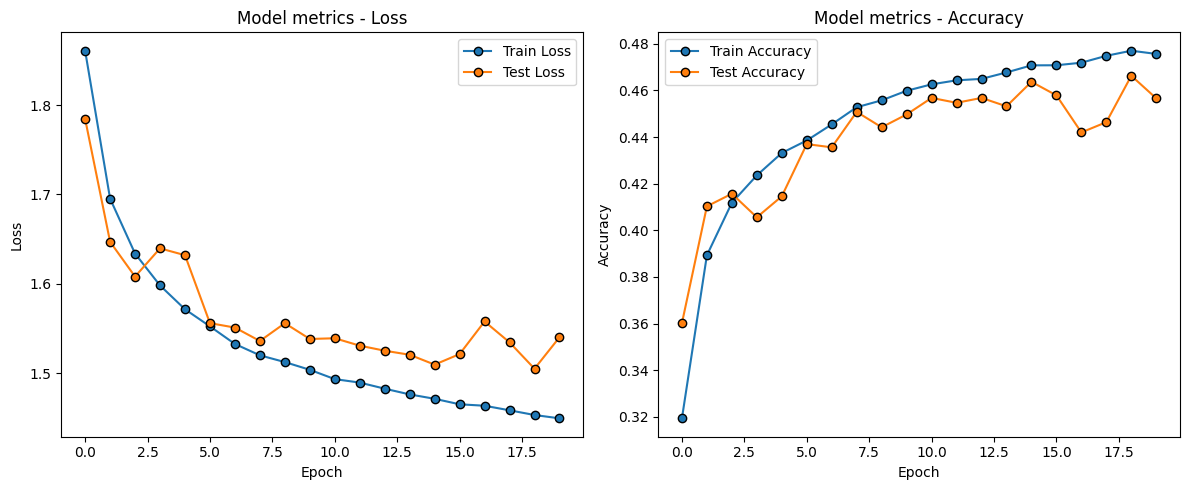

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

As can be seen from the graphs of Loss and Accuracy, although the training loss and accuracy are increasing the validation loss and accuracy do not show much improvement after the 10th epoch, this can be attributed to the model's limited capacity to capture complex patterns and spatial features of the image dataset. As a result the model will overfit the training data without generalizing to the validation/test data.

### CNN Model

In [21]:
#CNN Model
class CNN(nn.Module):
    """
     A Convolutional Neural Network (CNN) class for image classification on the CIFAR-10 dataset.
    """
    def __init__(self, dropout_rate=0.3):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # The operations are perfomerd in the following order ConV -> Relu --> Pool (for the covolution layers).
        # Dropout is added after each conv layer.
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout(x)
        x = x.view(-1, 64 * 8 * 8)     # Flatten the output and pass to the fully connected layer.
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        # Output layer
        x = self.fc2(x)
        return x

### Custom Learning Rate Scheduler

For the first few epochs (defined by `warmup_epochs`), the learning rate increases linearly from 0 to the initial learning rate (`initial_lr`). After the warmup phase, the learning rate starts decaying, with the rate being multiplied by a decay_rate every `decay_epochs`. 

The smooth increase in learning rate (for warmup phase) is  useful in models that are sensitive to large initial learning rates, this helps avoid large gradient updates that can disrupt the training in the starting phase.

In [34]:
def custom_lr_scheduler(optimizer, epoch, initial_lr=0.1, warmup_epochs=5, decay_rate=0.5, decay_epochs=10):
    """Custom LR scheduler with warmup and decay"""
    if epoch < warmup_epochs:
        learning_rate = initial_lr * (epoch + 1) / warmup_epochs
    else:
        learning_rate = initial_lr * (decay_rate ** ((epoch - warmup_epochs) // decay_epochs))
    
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate
    return learning_rate

### Training for CNN
Includes arguments for dropout and weight decay(L2 Regularization). The function is modified from the previous `run_training` function used for training the MLP.

In [35]:
# Training and Evaluation Function
def run_training(hidden_dim, lr, num_epochs, dropout_rate=0.3, weight_decay=1e-4):
    """
    Function to train and evaluate the CNN model for a given number of epochs with custom LR scheduling, dropout, and weight decay.
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = CNN(dropout_rate=dropout_rate).to(device)

    # Loss function, optimizer with weight decay(L2 regularization)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Lists to store training metrics
    train_losses = []
    test_losses = []
    
    train_accuracies = []
    test_accuracies = []
    
    learning_rates = []

    for epoch in tqdm(range(num_epochs)):
        # Update learning rate using the custom scheduler and store it
        current_lr = custom_lr_scheduler(optimizer, epoch, initial_lr=lr)
        learning_rates.append(current_lr)

        # Training
        train_loss, train_accuracy = train_nn(model, train_loader, criterion, optimizer, device)
        
        # Evaluation
        test_loss, test_accuracy = evaluate_nn(model, test_loader, criterion, device)

        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"LR: {current_lr:.6f}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

    return model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates

In [36]:
# Common model hyper parameters
hidden_dim = 128
lr = 0.001
num_epochs = 20

### Training Without dropuout and weight decay

The dropout_rate and weight_decay are set to zero.

In [37]:
dropout_rate = 0.0
weight_decay = 0
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  5%|██▊                                                     | 1/20 [00:46<14:50, 46.88s/it]

Epoch 1/20
LR: 0.000200, Train Loss: 1.5889, Train Acc: 0.4291
Test Loss: 1.3529, Test Acc: 0.5161


 10%|█████▌                                                  | 2/20 [01:37<14:39, 48.85s/it]

Epoch 2/20
LR: 0.000400, Train Loss: 1.2587, Train Acc: 0.5537
Test Loss: 1.1385, Test Acc: 0.5914


 15%|████████▍                                               | 3/20 [02:26<13:53, 49.03s/it]

Epoch 3/20
LR: 0.000600, Train Loss: 1.0853, Train Acc: 0.6201
Test Loss: 1.0198, Test Acc: 0.6398


 20%|███████████▏                                            | 4/20 [03:15<13:04, 49.06s/it]

Epoch 4/20
LR: 0.000800, Train Loss: 0.9654, Train Acc: 0.6631
Test Loss: 0.9606, Test Acc: 0.6685


 25%|██████████████                                          | 5/20 [04:04<12:13, 48.90s/it]

Epoch 5/20
LR: 0.001000, Train Loss: 0.8706, Train Acc: 0.6964
Test Loss: 0.9780, Test Acc: 0.6579


 30%|████████████████▊                                       | 6/20 [04:52<11:22, 48.77s/it]

Epoch 6/20
LR: 0.001000, Train Loss: 0.7652, Train Acc: 0.7318
Test Loss: 0.8792, Test Acc: 0.6959


 35%|███████████████████▌                                    | 7/20 [05:40<10:32, 48.63s/it]

Epoch 7/20
LR: 0.001000, Train Loss: 0.6590, Train Acc: 0.7668
Test Loss: 0.8831, Test Acc: 0.7063


 40%|██████████████████████▍                                 | 8/20 [06:28<09:41, 48.42s/it]

Epoch 8/20
LR: 0.001000, Train Loss: 0.5745, Train Acc: 0.7969
Test Loss: 0.9043, Test Acc: 0.7086


 45%|█████████████████████████▏                              | 9/20 [07:16<08:50, 48.27s/it]

Epoch 9/20
LR: 0.001000, Train Loss: 0.4889, Train Acc: 0.8267
Test Loss: 0.9542, Test Acc: 0.7036


 50%|███████████████████████████▌                           | 10/20 [08:04<08:02, 48.21s/it]

Epoch 10/20
LR: 0.001000, Train Loss: 0.4144, Train Acc: 0.8535
Test Loss: 1.0217, Test Acc: 0.6968


 55%|██████████████████████████████▎                        | 11/20 [08:53<07:13, 48.18s/it]

Epoch 11/20
LR: 0.001000, Train Loss: 0.3476, Train Acc: 0.8740
Test Loss: 1.1191, Test Acc: 0.6948


 60%|█████████████████████████████████                      | 12/20 [09:40<06:24, 48.10s/it]

Epoch 12/20
LR: 0.001000, Train Loss: 0.2936, Train Acc: 0.8951
Test Loss: 1.1960, Test Acc: 0.6927


 65%|███████████████████████████████████▊                   | 13/20 [10:29<05:36, 48.09s/it]

Epoch 13/20
LR: 0.001000, Train Loss: 0.2453, Train Acc: 0.9123
Test Loss: 1.2880, Test Acc: 0.6988


 70%|██████████████████████████████████████▌                | 14/20 [11:17<04:48, 48.11s/it]

Epoch 14/20
LR: 0.001000, Train Loss: 0.2097, Train Acc: 0.9254
Test Loss: 1.4341, Test Acc: 0.6995


 75%|█████████████████████████████████████████▎             | 15/20 [12:05<04:01, 48.22s/it]

Epoch 15/20
LR: 0.001000, Train Loss: 0.1824, Train Acc: 0.9356
Test Loss: 1.5468, Test Acc: 0.6963


 80%|████████████████████████████████████████████           | 16/20 [12:55<03:14, 48.71s/it]

Epoch 16/20
LR: 0.000500, Train Loss: 0.0745, Train Acc: 0.9755
Test Loss: 1.7009, Test Acc: 0.7012


 85%|██████████████████████████████████████████████▊        | 17/20 [13:45<02:26, 48.97s/it]

Epoch 17/20
LR: 0.000500, Train Loss: 0.0518, Train Acc: 0.9835
Test Loss: 1.9096, Test Acc: 0.7038


 90%|█████████████████████████████████████████████████▌     | 18/20 [14:35<01:38, 49.32s/it]

Epoch 18/20
LR: 0.000500, Train Loss: 0.0427, Train Acc: 0.9867
Test Loss: 2.0735, Test Acc: 0.7010


 95%|████████████████████████████████████████████████████▎  | 19/20 [15:25<00:49, 49.69s/it]

Epoch 19/20
LR: 0.000500, Train Loss: 0.0345, Train Acc: 0.9893
Test Loss: 2.1740, Test Acc: 0.7010


100%|███████████████████████████████████████████████████████| 20/20 [16:16<00:00, 48.82s/it]

Epoch 20/20
LR: 0.000500, Train Loss: 0.0327, Train Acc: 0.9898
Test Loss: 2.2790, Test Acc: 0.7057


### Plot metric curves (Training without dropout and weight decay)

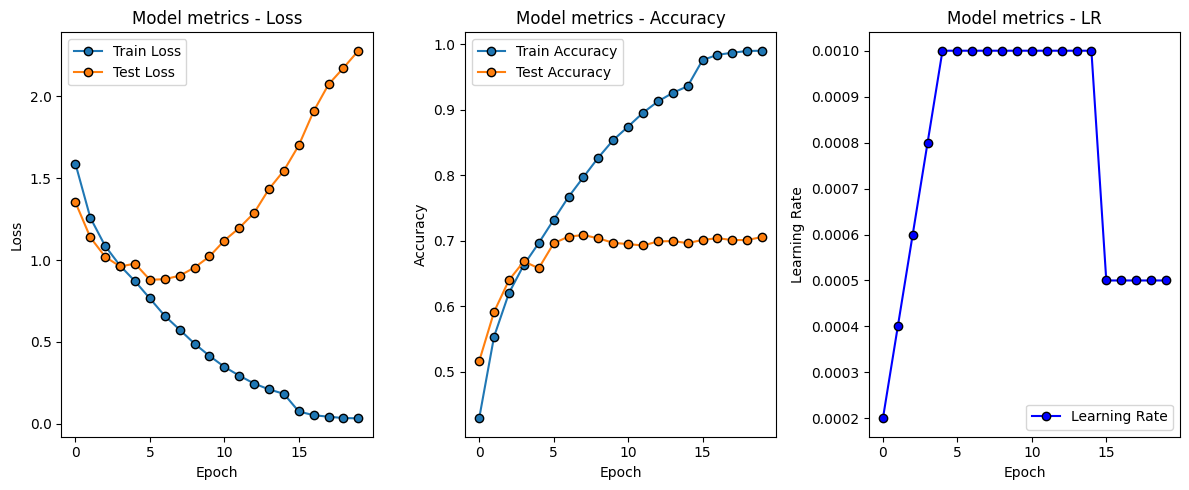

In [38]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

### Training with dropout and weight decay (L2 Regularization)

In [39]:
# Model hyper parameters
dropout_rate = 0.3
weight_decay = 1e-4

# Call the model training function
model, train_losses, train_accuracies, test_losses, test_accuracies, learning_rates = run_training(
    hidden_dim, lr, num_epochs, dropout_rate=dropout_rate, weight_decay=weight_decay
)

  5%|██▊                                                     | 1/20 [00:57<18:04, 57.10s/it]

Epoch 1/20
LR: 0.000200, Train Loss: 1.7190, Train Acc: 0.3789
Test Loss: 1.4204, Test Acc: 0.4943


 10%|█████▌                                                  | 2/20 [01:51<16:43, 55.72s/it]

Epoch 2/20
LR: 0.000400, Train Loss: 1.4264, Train Acc: 0.4853
Test Loss: 1.2349, Test Acc: 0.5676


 15%|████████▍                                               | 3/20 [02:55<16:52, 59.54s/it]

Epoch 3/20
LR: 0.000600, Train Loss: 1.2986, Train Acc: 0.5376
Test Loss: 1.1124, Test Acc: 0.6028


 20%|███████████▏                                            | 4/20 [04:06<16:59, 63.73s/it]

Epoch 4/20
LR: 0.000800, Train Loss: 1.1919, Train Acc: 0.5744
Test Loss: 1.0325, Test Acc: 0.6389


 25%|██████████████                                          | 5/20 [05:20<16:52, 67.47s/it]

Epoch 5/20
LR: 0.001000, Train Loss: 1.1179, Train Acc: 0.6054
Test Loss: 0.9753, Test Acc: 0.6566


 30%|████████████████▊                                       | 6/20 [06:19<15:07, 64.85s/it]

Epoch 6/20
LR: 0.001000, Train Loss: 1.0499, Train Acc: 0.6303
Test Loss: 0.9229, Test Acc: 0.6893


 35%|███████████████████▌                                    | 7/20 [07:17<13:32, 62.49s/it]

Epoch 7/20
LR: 0.001000, Train Loss: 1.0001, Train Acc: 0.6462
Test Loss: 0.8871, Test Acc: 0.6972


 40%|██████████████████████▍                                 | 8/20 [08:14<12:09, 60.78s/it]

Epoch 8/20
LR: 0.001000, Train Loss: 0.9672, Train Acc: 0.6571
Test Loss: 0.8734, Test Acc: 0.6996


 45%|█████████████████████████▏                              | 9/20 [09:11<10:55, 59.60s/it]

Epoch 9/20
LR: 0.001000, Train Loss: 0.9307, Train Acc: 0.6729
Test Loss: 0.8477, Test Acc: 0.7062


 50%|███████████████████████████▌                           | 10/20 [10:13<10:02, 60.21s/it]

Epoch 10/20
LR: 0.001000, Train Loss: 0.9078, Train Acc: 0.6793
Test Loss: 0.8420, Test Acc: 0.7168


 55%|██████████████████████████████▎                        | 11/20 [11:21<09:24, 62.68s/it]

Epoch 11/20
LR: 0.001000, Train Loss: 0.8840, Train Acc: 0.6881
Test Loss: 0.8211, Test Acc: 0.7225


 60%|█████████████████████████████████                      | 12/20 [12:16<08:02, 60.32s/it]

Epoch 12/20
LR: 0.001000, Train Loss: 0.8693, Train Acc: 0.6949
Test Loss: 0.8196, Test Acc: 0.7178


 65%|███████████████████████████████████▊                   | 13/20 [13:16<07:01, 60.20s/it]

Epoch 13/20
LR: 0.001000, Train Loss: 0.8523, Train Acc: 0.6989
Test Loss: 0.8352, Test Acc: 0.7176


 70%|██████████████████████████████████████▌                | 14/20 [14:23<06:14, 62.41s/it]

Epoch 14/20
LR: 0.001000, Train Loss: 0.8264, Train Acc: 0.7083
Test Loss: 0.7997, Test Acc: 0.7207


 75%|█████████████████████████████████████████▎             | 15/20 [15:18<04:59, 59.91s/it]

Epoch 15/20
LR: 0.001000, Train Loss: 0.8207, Train Acc: 0.7117
Test Loss: 0.8132, Test Acc: 0.7218


 80%|████████████████████████████████████████████           | 16/20 [16:10<03:51, 57.77s/it]

Epoch 16/20
LR: 0.000500, Train Loss: 0.7218, Train Acc: 0.7458
Test Loss: 0.7534, Test Acc: 0.7401


 85%|██████████████████████████████████████████████▊        | 17/20 [17:03<02:48, 56.31s/it]

Epoch 17/20
LR: 0.000500, Train Loss: 0.6993, Train Acc: 0.7509
Test Loss: 0.7680, Test Acc: 0.7362


 90%|█████████████████████████████████████████████████▌     | 18/20 [17:56<01:50, 55.11s/it]

Epoch 18/20
LR: 0.000500, Train Loss: 0.6732, Train Acc: 0.7597
Test Loss: 0.7239, Test Acc: 0.7515


 95%|████████████████████████████████████████████████████▎  | 19/20 [18:51<00:55, 55.21s/it]

Epoch 19/20
LR: 0.000500, Train Loss: 0.6639, Train Acc: 0.7645
Test Loss: 0.7310, Test Acc: 0.7495


100%|███████████████████████████████████████████████████████| 20/20 [19:55<00:00, 59.80s/it]

Epoch 20/20
LR: 0.000500, Train Loss: 0.6433, Train Acc: 0.7712
Test Loss: 0.7263, Test Acc: 0.7484


### Plot metric curves (Training with dropout and weight decay)

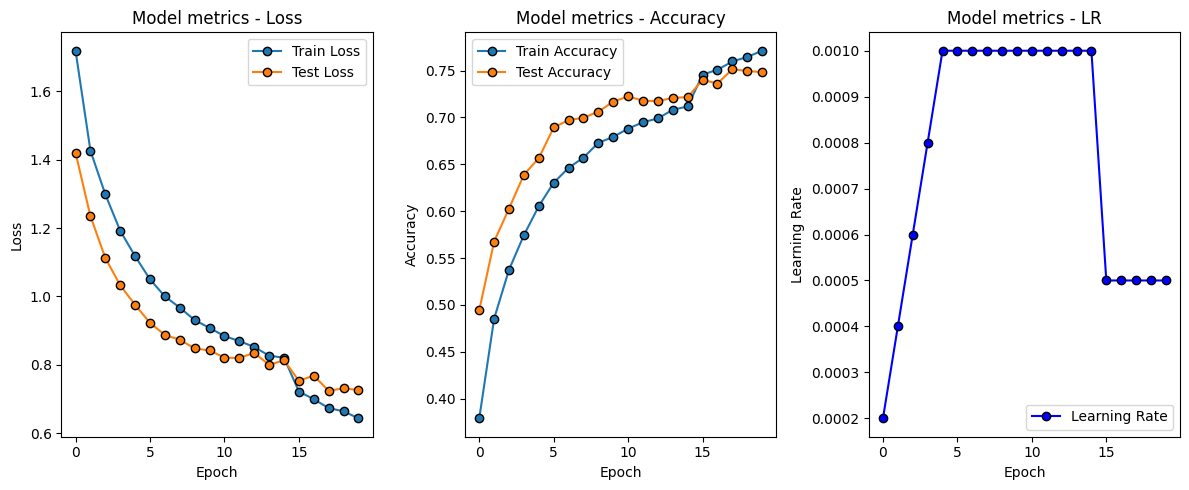

In [41]:
# plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss', marker='o', markeredgecolor='black')
plt.plot(test_losses, label='Test Loss', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model metrics - Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o', markeredgecolor='black')
plt.plot(test_accuracies, label='Test Accuracy', marker='o', markeredgecolor='black')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model metrics - Accuracy')
plt.tight_layout()

plt.subplot(1, 3, 3)
plt.plot(learning_rates, label='Learning Rate', marker='o', markeredgecolor='black', color='blue')
# plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.title('Model metrics - LR')
plt.tight_layout()

plt.show()

### Result comparison

When comparing the two models i.e. with and without dropout and L2 regularization we see that the model trained with dropout and weight decay shows a gradual and smooth decrease in training loss, along with a steady increase in accuracy. In contrast, the model without dropout and weight decay begins to show a significant difference between training and validation loss after the 5th epoch, indicating overfitting. This model’s (without dropout and L2) validation accuracy stagnates after the 5th epoch, even as training accuracy continues to increase.

The model with dropout and L2 regularization shows better generalization to unseen data, resulting in more stable validation accuracy and reduced overfitting. In contrast, the model without these regularization techniques is more sensitive to noise and variations in validation and test data, leading to poorer performance on new data.

In [59]:
# Function to get predictions and true labels
def get_predictions(model, loader, device):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_predictions), np.array(all_labels)

In [60]:
# Get predictions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y_pred, y_true = get_predictions(model, test_loader, device)

In [68]:
label_names = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog",
    "Horse","Ship","Truck"]

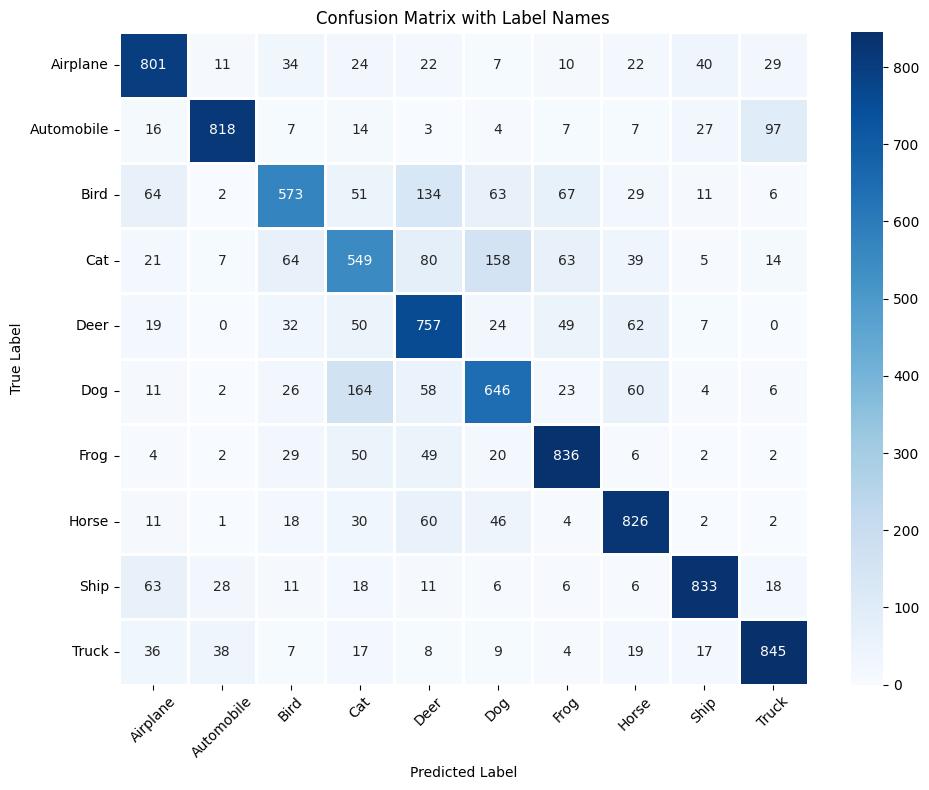

In [77]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names, linewidths=1)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix with Label Names')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Kernel and feature map visualization

##### Kernel Visualization

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Inspired from https://www.kaggle.com/code/fqpang/visualizing-cnn-using-pytorch (cell 18)

# Function to visualize convolutional kernels (weights)
def visualize_kernels(layer):
    kernels = layer.weight.data.cpu().numpy()
    num_kernels = kernels.shape[0]  # Total number of kernels
    num_channels = kernels.shape[1]  # Number of channels
    
    fig, axs = plt.subplots(4, 8, figsize=(10, 5))
    fig.suptitle(f"Convolutional Kernels (Weights) for {str(layer)}", fontsize=10)

    for i, ax in enumerate(axs.flat):
        if i < num_kernels:
            kernel = kernels[i]
            
            # Normalize kernel
            kernel = (kernel - np.mean(kernel)) / np.std(kernel)
            kernel = np.clip(kernel+ 0.5, 0, 1)
            # kernel = np.clip(kernel, 0, 1)

            if num_channels != 3:
                ax.imshow(kernel[0, :, :], cmap='gray')
            elif num_channels == 3:
                ax.imshow(np.transpose(kernel, (1, 2, 0)))  # Rearranging dimensions
            
            ax.set_title(f"Filter {i + 1}")
            ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

/tmp/ipykernel_8855/4126111674.py:20: RuntimeWarning: divide by zero encountered in divide
  kernel = (kernel - np.mean(kernel)) / np.std(kernel)


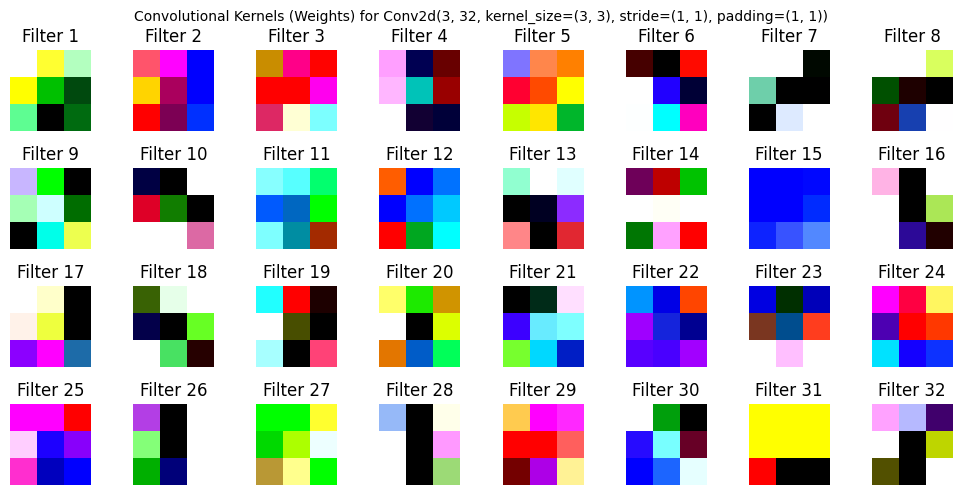

In [138]:
visualize_kernels(model.conv1)

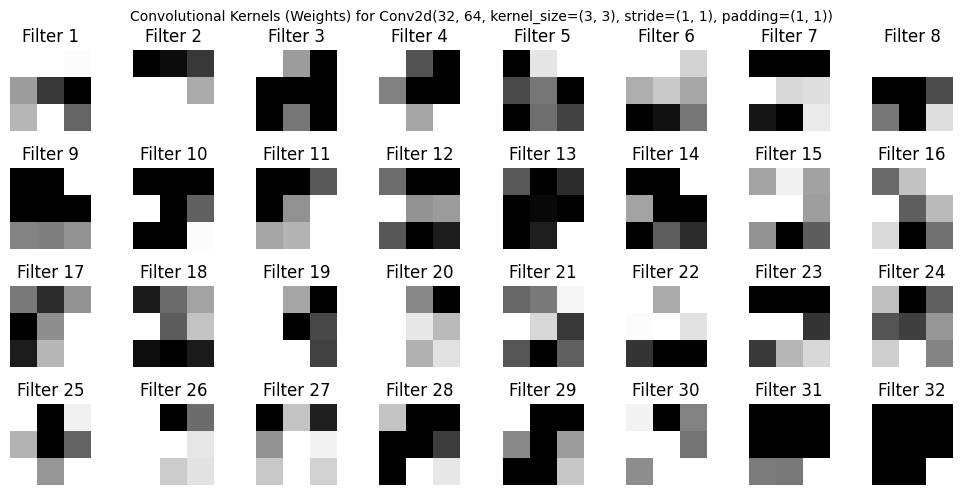

In [140]:
visualize_kernels(model.conv2)

#### Visualize Feature maps

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


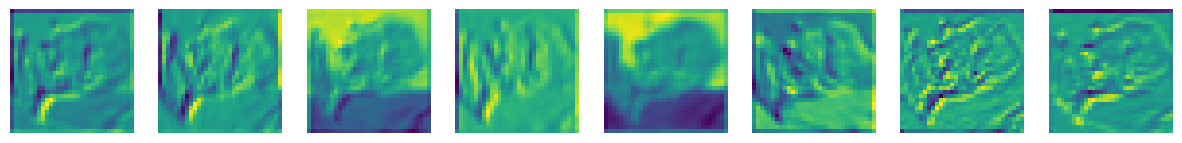

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


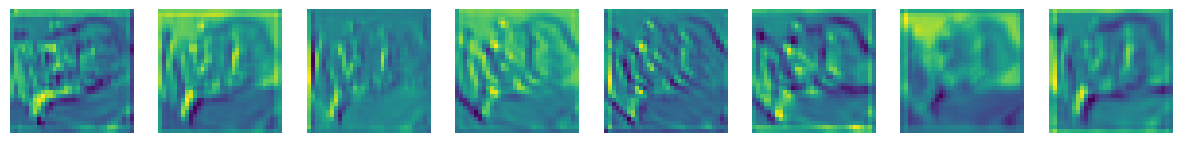

In [148]:
# Function to visualize feature maps
def visualize_feature_maps(model, images):
    x = images.to('cpu')
    for name, layer in model.named_children():
        
        if isinstance(layer, nn.Conv2d):
            x = layer(x)
            print(layer)
            plt.figure(figsize=(15, 15))
            # plt.suptitle(f"Feature Maps from Layer: {name}")
            
            feature_maps = x[0].detach().cpu().numpy()
            for i in range(min(8, len(feature_maps))):
                plt.subplot(1, 8, i + 1)
                plt.imshow(feature_maps[i])
                plt.axis('off')
            plt.show()
            # break  # Visualize first conv layer only

# Visualize CNN feature maps

data_iter = iter(test_loader)
images, _ = next(data_iter)
visualize_feature_maps(model, images)